# Binary Classification for Minimum Income

by: Aaron Abrogena

In [1]:
#import all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()
pd.set_option('display.float_format', lambda x: '%.2f' % x)

C:\Users\aaron\Anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
df = pd.read_csv("Minimum Income Classifier Data.csv", dtype={'SN_ID': str})

In [3]:
df.head()

,SN_ID,TYPE_LIVING_QUARTERS,TOTAL_NUM_ROOMS,TENURE_STATUS_FINAL,ACCESS_TO_TOILET_FINAL,ACCESS_TO_PIPE_WATER_FINAL,OWN_COMPUTER,OWN_TV,FAVORITE_NUMBER,INTERNET_ACCESS_FINAL,AGE_HEAD_OF_HOUSEHOLD,HEAD_OF_HOUSEHOLD,EMPLOYEMENT_HEAD_HOUSEHOLD_FINAL,EMPTY_COLUMN,HOUSE_HOLD_SIZE,HOUSEHOLD_SIZE,NUM_CHILD_IN_HOUSEHOLD,INCOME_CLASSIFIER
0,11941726014,House,4.00,Owned and fully paid off,Flush toilet with septic tank,Piped tap water inside the dwelling,Y,Y,8.00,From home,70.00,Female,Not economically active,nan,1.00,1.00,0.00,1.00
1,11120721991,House,6.00,Owned and fully paid off,Flush toilet connected to sewerage system,Piped tap water inside the dwelling,N,Y,2.00,No access to internet,nan,Female,Employed,nan,6.00,6.00,4.00,0.00
2,10505983909,House,5.00,Owned and fully paid off,Flush toilet connected to sewerage system,Piped tap water inside the dwelling,N,Y,14.00,No access to internet,74.00,Female,Not economically active,nan,3.00,3.00,2.00,1.00
3,10191851640,House,2.00,Other,Flush toilet connected to sewerage system,Piped tap water inside the yard,N,Y,9.00,No access to internet,31.00,Male,Employed,nan,3.00,3.00,1.00,1.00
4,11985681855,House,2.00,Occupied rent-free,Flush toilet connected to sewerage system,Piped tap water inside the dwelling,N,Y,8.00,From cell phone,39.00,Female,Employed,nan,3.00,3.00,1.00,0.00


In [4]:
#what is the split of our data label col?
df.INCOME_CLASSIFIER.value_counts()

1.00    141880
0.00    126362
Name: INCOME_CLASSIFIER, dtype: int64

In [5]:
#find all the dtypes 
df.dtypes

SN_ID                                object
TYPE_LIVING_QUARTERS                 object
TOTAL_NUM_ROOMS                     float64
TENURE_STATUS_FINAL                  object
ACCESS_TO_TOILET_FINAL               object
ACCESS_TO_PIPE_WATER_FINAL           object
OWN_COMPUTER                         object
OWN_TV                               object
FAVORITE_NUMBER                     float64
INTERNET_ACCESS_FINAL                object
AGE_HEAD_OF_HOUSEHOLD               float64
HEAD_OF_HOUSEHOLD                    object
EMPLOYEMENT_HEAD_HOUSEHOLD_FINAL     object
EMPTY_COLUMN                        float64
HOUSE_HOLD_SIZE                     float64
HOUSEHOLD_SIZE                      float64
NUM_CHILD_IN_HOUSEHOLD              float64
INCOME_CLASSIFIER                   float64
dtype: object

In [6]:
#remove duplicate column but check which one is worse
df[['HOUSEHOLD_SIZE', 'HOUSE_HOLD_SIZE']].describe()

,HOUSEHOLD_SIZE,HOUSE_HOLD_SIZE
count,268242.00,268242.00
mean,3.48,3.48
std,2.34,2.34
min,1.00,1.00
25%,2.00,2.00
50%,3.00,3.00
75%,5.00,5.00
max,30.00,30.00


It seems that `HOUSEHOLD_SIZE` and `HOUSE_HOLD_SIZE` are identical so dropping either should be fine. 

In [7]:
del df['HOUSE_HOLD_SIZE'], df['EMPTY_COLUMN']

In [8]:
#I also noticed a column called favorite number, I'm not sure if this information is junk but for now I'll ignore it
del df['FAVORITE_NUMBER']

In [9]:
#find the number of NAN values in each column
df.isna().sum()

SN_ID                                   9
TYPE_LIVING_QUARTERS                    9
TOTAL_NUM_ROOMS                         9
TENURE_STATUS_FINAL                     9
ACCESS_TO_TOILET_FINAL              11405
ACCESS_TO_PIPE_WATER_FINAL              9
OWN_COMPUTER                            9
OWN_TV                                  9
INTERNET_ACCESS_FINAL                   9
AGE_HEAD_OF_HOUSEHOLD               51143
HEAD_OF_HOUSEHOLD                       9
EMPLOYEMENT_HEAD_HOUSEHOLD_FINAL        9
HOUSEHOLD_SIZE                          9
NUM_CHILD_IN_HOUSEHOLD                  9
INCOME_CLASSIFIER                       9
dtype: int64

it seems `ACCESS_TO_TOILET_PAPER` and `AGE_OF_HOUSEHOLD` have the most nulls

In [10]:
#show the 9 rows there SN_ID are null
df[df['SN_ID'].isnull()]

,SN_ID,TYPE_LIVING_QUARTERS,TOTAL_NUM_ROOMS,TENURE_STATUS_FINAL,ACCESS_TO_TOILET_FINAL,ACCESS_TO_PIPE_WATER_FINAL,OWN_COMPUTER,OWN_TV,INTERNET_ACCESS_FINAL,AGE_HEAD_OF_HOUSEHOLD,HEAD_OF_HOUSEHOLD,EMPLOYEMENT_HEAD_HOUSEHOLD_FINAL,HOUSEHOLD_SIZE,NUM_CHILD_IN_HOUSEHOLD,INCOME_CLASSIFIER
18,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,nan
60,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,nan
89,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,nan
278,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,nan
176914,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,nan
176928,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,nan
176962,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,nan
249675,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,nan
249691,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,nan


In [11]:
#drop these columns
df = df[df['SN_ID'].notnull()]

In [12]:
#find how many values in each of the object columns
cat_columns = [col for col in df.columns if df.dtypes[col] == 'object' and col != 'SN_ID']
display(df[cat_columns].nunique().rename("# of Categories").to_frame())

,# of Categories
TYPE_LIVING_QUARTERS,2
TENURE_STATUS_FINAL,5
ACCESS_TO_TOILET_FINAL,7
ACCESS_TO_PIPE_WATER_FINAL,7
OWN_COMPUTER,2
OWN_TV,2
INTERNET_ACCESS_FINAL,5
HEAD_OF_HOUSEHOLD,2
EMPLOYEMENT_HEAD_HOUSEHOLD_FINAL,5


In [13]:
#find distribution per numerical column
df.describe([0.005, 0.01, .95, .99, .999])

,TOTAL_NUM_ROOMS,AGE_HEAD_OF_HOUSEHOLD,HOUSEHOLD_SIZE,NUM_CHILD_IN_HOUSEHOLD,INCOME_CLASSIFIER
count,268242.00,217108.00,268242.00,268242.00,268242.00
mean,4.33,47.82,3.48,1.98,0.53
std,2.40,16.53,2.34,1.91,0.50
min,1.00,10.00,1.00,0.00,0.00
0.5%,1.00,18.00,1.00,0.00,0.00
1%,1.00,20.00,1.00,0.00,0.00
50%,4.00,46.00,3.00,1.00,1.00
95%,9.00,77.00,8.00,6.00,1.00
99%,11.00,86.00,11.00,8.00,1.00
99.9%,15.00,97.00,15.00,10.00,1.00


In [14]:
#it is unlikely that the head of a household is 111 years old or is less than 18 so we can filter out those values
#we will filter out top bottom and top values keeping only 99% of the data
print("BEFORE:")
print(len(df))
df = df[df['AGE_HEAD_OF_HOUSEHOLD'].between(18,97, inclusive=True)]
print("AFTER:")
print(len(df))

BEFORE:
268242
AFTER:
216113


In [16]:
#check if we have affected the distribution of the label col
df.INCOME_CLASSIFIER.value_counts()

1.00    114677
0.00    101436
Name: INCOME_CLASSIFIER, dtype: int64

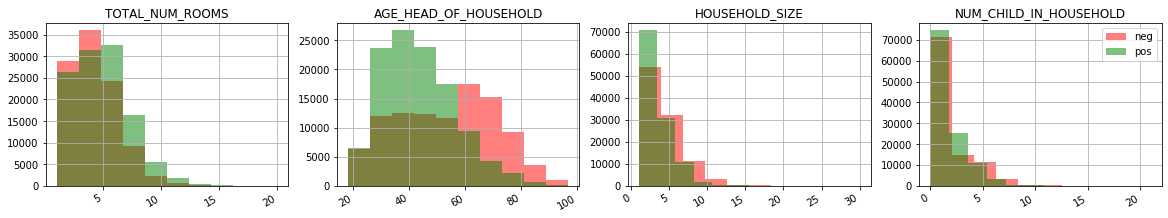

In [17]:
#find distribution per numerical column 
label_col = 'INCOME_CLASSIFIER'
numerical_columns = [col for col in df.columns if df.dtypes[col] != 'object' and col != label_col]
n_cols = len(numerical_columns)
fig, axes = plt.subplots((len(numerical_columns) + 2) // n_cols, n_cols, figsize=(20, 3))
axes = axes.flatten()
for ax, col in zip(axes, numerical_columns):
    df[df[label_col] == 0][col].rename("neg").hist(ax=ax, color="red", alpha=0.5)
    df[df[label_col] == 1][col].rename("pos").hist(ax=ax, color="green", alpha=0.5)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    ax.set_title(col)
    plt.legend(["neg", "pos"])

plt.show()

it would seem `AGE_HEAD_OF_HOUSEHOLD` is more negative as the number gets higher 

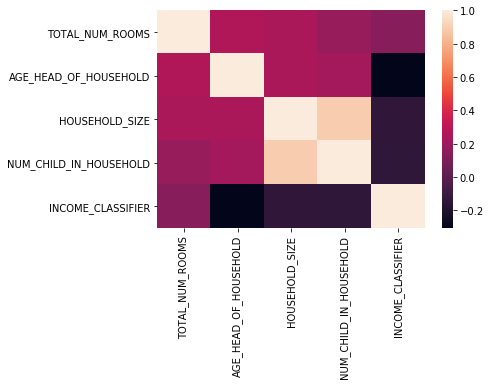

In [18]:
#are any of the numerical columns higly correlated to the label col?

sns.heatmap(df.corr())

it seems none of the columns are highly correlated to the label col though almost obviously the size of the household is correlated to the number of children

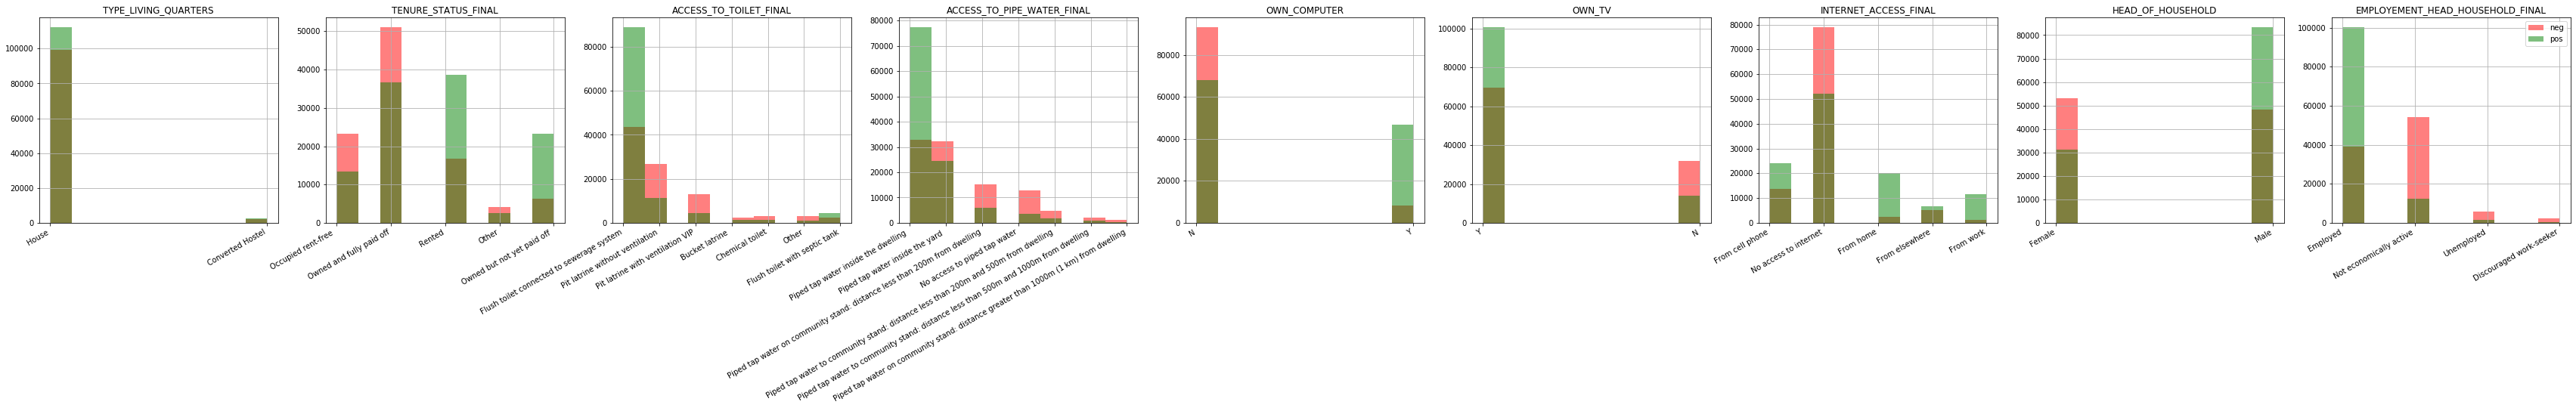

In [19]:
#find distrubtion per categorical column
n_cols = len(cat_columns)
fig, axes = plt.subplots((len(cat_columns) + 5) // n_cols, n_cols, figsize=(60, 5))
axes = axes.flatten()
for ax, col in zip(axes, cat_columns):
    df[df[label_col] == 0][col].rename("neg").hist(ax=ax, color="red", alpha=0.5)
    df[df[label_col] == 1][col].rename("pos").hist(ax=ax, color="green", alpha=0.5)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    ax.set_title(col)
    plt.legend(["neg", "pos"])

plt.show()

Upon visual inspection it seems that `ACCESS_TO_TOILET_FINAL` can be brokein into just two columns as FLUSH TOILET CONNECTED TO SEWERAGE SYSTEM holds most of the values. Same can be said about `ACCESS_TO_PIPE_WATER_FINAL`.

`TYPE_LIVING_QUARTERS` are mostly just House and it is possible to drop this column all together.

For now, we shall keep them all and go with one hot encoding for now then we shall see if we see any performance gains by doing the manual adjustments later.


In [20]:
#import the relevant sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cf
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# Trial 1 -- let's try making a simple Decision Tree with just one hot encoded values

In [21]:
#make a copy of the original dataframe but fill all NaN values with 0 for now
df1 = df.copy().fillna(0)

In [22]:
df1 = pd.get_dummies(df1, columns=cat_columns, drop_first=True)
df1.shape

(216113, 34)

In [23]:
#use all the columns still in the dataset except for the ID and the label col
training_cols = [col for col in df1.columns if col != 'SN_ID' and col != 'INCOME_CLASSIFIER']

In [24]:
#make the train test split 
X = df1[training_cols].values
y = df1['INCOME_CLASSIFIER']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.75, test_size=0.25, random_state = 42)

In [25]:
#Use sklearn's decision Tree classifier, we will use max_depth 5 as to avoid overfitting
model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=14, class_weight='balanced')

In [26]:
%%time
model.fit(X_train, y_train)
y_model_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.7805622906217031
Wall time: 701 ms


In [27]:
print (classification_report(y_test, y_model_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77     25287
         1.0       0.81      0.77      0.79     28742

    accuracy                           0.78     54029
   macro avg       0.78      0.78      0.78     54029
weighted avg       0.78      0.78      0.78     54029



In [28]:
conf_mat_tree = cf(y_test, y_model_pred)

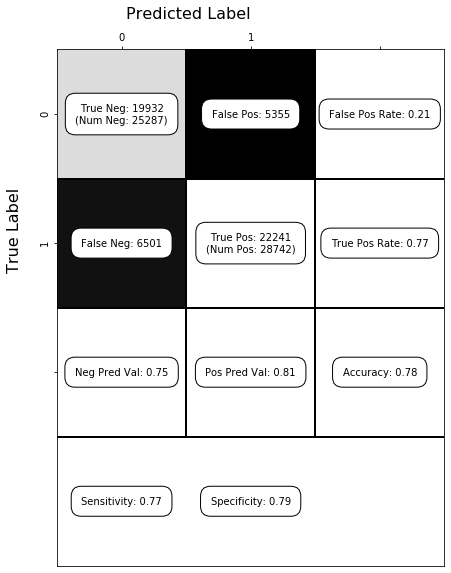

Sensitivity: 0.7738153225245286
Specificity: 0.7882311068928699


In [29]:
#show confusion matrix
import show_confusion_matrix as scm
scm.show_confusion_matrix(conf_mat_tree)

We can see that right off the bat our model already did quite well getting 78% accuracy with minimal feature engineering and no cross validation.

# Trial 2 let's try doing some feature engineering

In [30]:
#let's still use df1 as we made it awhile ago but let's try some dimensionality reduction using Boruta

#Boruta is an open source library that creates ghost features and uses a machine learning algorithm to get feature importances
#between the ghost features and the actual features you have. If the ghost features outrank your actual features then the
#features get deleted.
from boruta import BorutaPy 

#we will use sklearn's randomforest classifier with a max depth of 7 for boruta 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=7)

boruta_feature_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42, max_iter = 50, perc = 90)
boruta_feature_selector.fit(X, y)

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	26
Tentative: 	6
Rejected: 	0
Iteration: 	9 / 50
Confirmed: 	26
Tentative: 	4
Rejected: 	2
Iteration: 	10 / 50
Confirmed: 	26
Tentative: 	4
Rejected: 	2
Iteration: 	11 / 50
Confirmed: 	26
Tentative: 	4
Rejected: 	2
Iteration: 	12 / 50
Confirmed: 	27
Tentative: 	3
Rejected: 	2
Iteration: 	13 / 50
Confirmed: 	27
Tentative: 	3
Rejected: 	2
Iteration: 	14 / 50
Confirmed: 	27
Tentative: 	3
Rejected: 	2
Iteration: 	15 / 50
Confirmed: 	27
Tentative: 	3
Rejected: 	2
Iteration: 	16 / 50
Confirmed: 	28
Tentative: 	2
Rejected: 	2
Iteration: 	17 / 

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=7,
                                          n_estimators=110, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x23A2E9348C8),
         max_iter=50, n_estimators='auto', perc=90,
         random_state=RandomState(MT19937) at 0x23A2E9348C8, verbose=2)

boruta elected to drop columns after 50 iterations

In [31]:
boruta_cols = pd.DataFrame(list(zip(boruta_feature_selector.support_, training_cols)))
boruta_cols = boruta_cols[boruta_cols[0] == True][1].tolist()

In [32]:
#what columns did boruta choose to drop?
set(training_cols) - set(boruta_cols)

{'ACCESS_TO_PIPE_WATER_FINAL_Piped tap water on community stand: distance greater than 1000m (1 km) from dwelling',
 'ACCESS_TO_PIPE_WATER_FINAL_Piped tap water to community stand: distance less than 500m and 1000m from dwelling',
 'TYPE_LIVING_QUARTERS_House'}

as mentioned earlier type_living_quarters is droppable also the access to pipe water

In [78]:
#redo the training with just the decision tree classifier, we will overwite X and y here since we don't need the first one anymore

X = df1[boruta_cols].values
y = df1['INCOME_CLASSIFIER'].values

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.75, test_size=0.25, random_state = 42)


In [34]:
%%time

model.fit(X_train, y_train)
y_model_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.7805622906217031
Wall time: 734 ms


In [35]:
print (classification_report(y_test, y_model_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77     25287
         1.0       0.81      0.77      0.79     28742

    accuracy                           0.78     54029
   macro avg       0.78      0.78      0.78     54029
weighted avg       0.78      0.78      0.78     54029



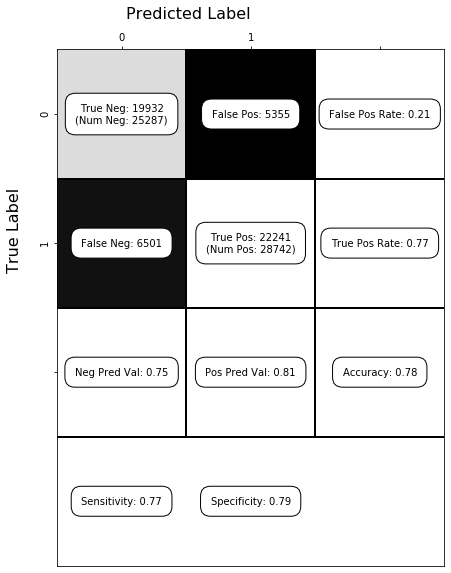

Sensitivity: 0.7738153225245286
Specificity: 0.7882311068928699


In [36]:
conf_mat_tree = cf(y_test, y_model_pred)
scm.show_confusion_matrix(conf_mat_tree)

removing the columns did not have any change on the result of the model accuracy but we did see slight performance gains in time

# Try accounting for the slight imbalance in the dataset

In [37]:
#We have a slight imbalance in the label col as there are 115k positive and 100k negative. Ideally they should be equal.

from imblearn.over_sampling import SMOTE

# Oversample minority using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X_train, y_train)

In [38]:
%%time
model.fit(X_res, y_res)
y_model_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.7805622906217031
Wall time: 743 ms


              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77     25287
         1.0       0.81      0.77      0.79     28742

    accuracy                           0.78     54029
   macro avg       0.78      0.78      0.78     54029
weighted avg       0.78      0.78      0.78     54029



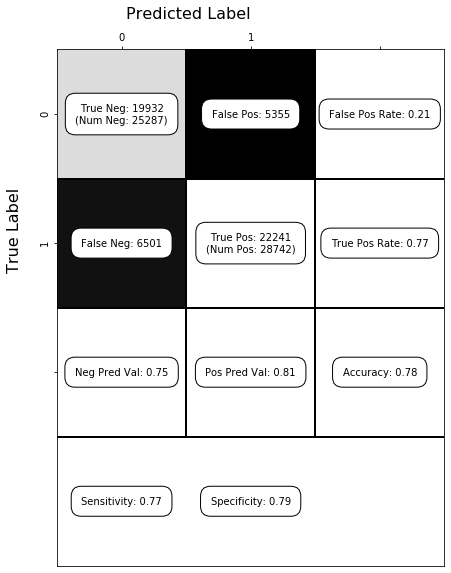

Sensitivity: 0.7738153225245286
Specificity: 0.7882311068928699


In [39]:
print (classification_report(y_test, y_model_pred))
conf_mat_tree = cf(y_test, y_model_pred)
scm.show_confusion_matrix(conf_mat_tree)


the results are identical to the previous scenarios, we will skip this step in the next trial.

# Try using a more advanced model

In [42]:
#Now we will try to seriously model using a more advanced algorithm called Gradient Boosted Decision Trees

from sklearn.ensemble import GradientBoostingClassifier

In [69]:
gbdt = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', max_depth=8)
gbdt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8)

In [70]:
y_model_pred = gbdt.predict(X_test)
print(gbdt.score(X_test, y_test))

0.7983675433563456


              precision    recall  f1-score   support

         0.0       0.80      0.75      0.78     25287
         1.0       0.79      0.84      0.82     28742

    accuracy                           0.80     54029
   macro avg       0.80      0.80      0.80     54029
weighted avg       0.80      0.80      0.80     54029



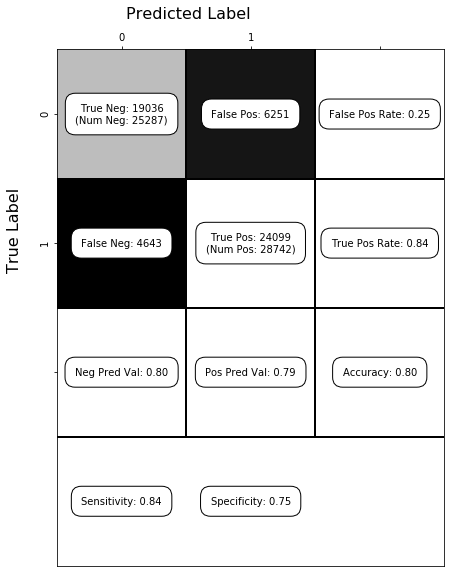

Sensitivity: 0.8384593973975367
Specificity: 0.7527978803337684


In [71]:
print (classification_report(y_test, y_model_pred))
conf_mat_tree = cf(y_test, y_model_pred)
scm.show_confusion_matrix(conf_mat_tree)

Better results with a greedier algorithm

In [47]:
# We can also try XGBoost
import xgboost as xgb

In [65]:
xg_reg = xgb.XGBClassifier(learning_rate = 0.1,
                max_depth = 8, alpha = 10, n_estimators = 100)

In [66]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [67]:
print(xg_reg.score(X_test, y_test))

0.7994225323437413


              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78     25287
         1.0       0.79      0.84      0.82     28742

    accuracy                           0.80     54029
   macro avg       0.80      0.80      0.80     54029
weighted avg       0.80      0.80      0.80     54029



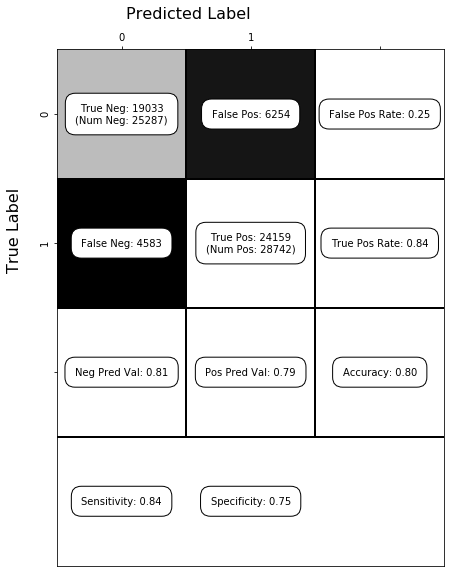

Sensitivity: 0.8405469347992485
Specificity: 0.7526792422984142


In [68]:
print (classification_report(y_test, preds))
conf_mat_tree = cf(y_test, preds)
scm.show_confusion_matrix(conf_mat_tree)

In [79]:
#lastly we can try making a neural network 

#we have been using tree based models so far -- you do not need to scale features in tree based models.

#For this ANN we will need to use standard scaler.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Train on 162084 samples
Epoch 1/100
162084/162084 [==============================] - 8s 48us/sample - loss: 0.4536 - accuracy: 0.7792
Epoch 2/100
162084/162084 [==============================] - 7s 42us/sample - loss: 0.4376 - accuracy: 0.7902
Epoch 3/100
162084/162084 [==============================] - 7s 43us/sample - loss: 0.4355 - accuracy: 0.7916
Epoch 4/100
162084/162084 [==============================] - 7s 42us/sample - loss: 0.4347 - accuracy: 0.7923
Epoch 5/100
162084/162084 [==============================] - 7s 43us/sample - loss: 0.4340 - accuracy: 0.7924
Epoch 6/100
162084/162084 [==============================] - 7s 42us/sample - loss: 0.4334 - accuracy: 0.7929
Epoch 7/100
162084/162084 [==============================] - 7s 42us/sample - loss: 0.4332 - accuracy: 0.7935
Epoch 8/100
162084/162084 [==============================] - 7s 43us/sample - loss: 0.4327 - accuracy: 0.7937
Epoch 9/100
162084/162084 [==============================] - 7s 42us/sample - loss: 0.4323 - acc

162084/162084 [==============================] - 7s 43us/sample - loss: 0.4285 - accuracy: 0.7970
Epoch 75/100
162084/162084 [==============================] - 7s 43us/sample - loss: 0.4284 - accuracy: 0.7965
Epoch 76/100
162084/162084 [==============================] - 7s 42us/sample - loss: 0.4285 - accuracy: 0.7968
Epoch 77/100
162084/162084 [==============================] - 7s 42us/sample - loss: 0.4284 - accuracy: 0.7968
Epoch 78/100
162084/162084 [==============================] - 7s 42us/sample - loss: 0.4283 - accuracy: 0.7966
Epoch 79/100
162084/162084 [==============================] - 7s 42us/sample - loss: 0.4283 - accuracy: 0.7967
Epoch 80/100
162084/162084 [==============================] - 7s 43us/sample - loss: 0.4283 - accuracy: 0.7967
Epoch 81/100
162084/162084 [==============================] - 7s 43us/sample - loss: 0.4284 - accuracy: 0.7964
Epoch 82/100
162084/162084 [==============================] - 7s 42us/sample - loss: 0.4284 - accuracy: 0.7968
Epoch 83/100
1

In [105]:
ann_pred = ann.predict(X_test)

#the ANN outputs a continuous value. You will need to set a threshold. In this instance, let's use 0.5
ann_pred = (ann_pred >= 0.5)

from sklearn.metrics import accuracy_score

print (accuracy_score(y_test, ann_pred))

0.796387125432638


              precision    recall  f1-score   support

         0.0       0.80      0.75      0.78     25287
         1.0       0.79      0.84      0.81     28742

    accuracy                           0.80     54029
   macro avg       0.80      0.79      0.79     54029
weighted avg       0.80      0.80      0.80     54029



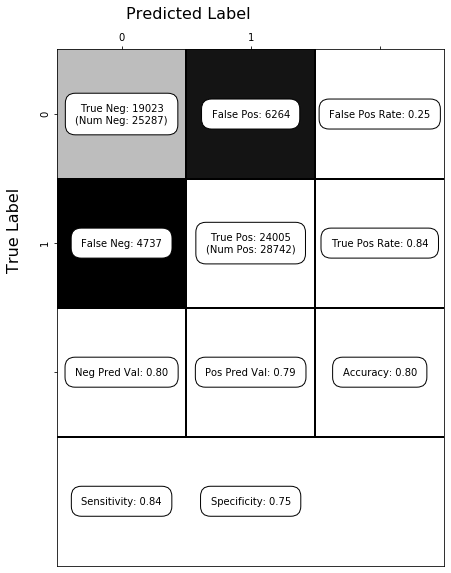

Sensitivity: 0.835188922134855
Specificity: 0.7522837821805671


In [92]:
print (classification_report(y_test, ann_pred))
conf_mat_tree = cf(y_test, ann_pred)
scm.show_confusion_matrix(conf_mat_tree)

In [94]:
#Setup for GRIDSEARCH for Gradient Boosted Classifier



from sklearn.model_selection import GridSearchCV
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.1, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5],
    "max_features":["sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 1.0],
    "n_estimators":[10]
    }


clf = GridSearchCV(GradientBoostingClassifier() ,  parameters, cv=5, n_jobs=-1, verbose=10)

clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.best_params_)

y_model_pred = clf.predict(X_test)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   35.5s


KeyboardInterrupt: 

In [ ]:
print(clf.score(X_test, y_train))

In [ ]:
print (classification_report(y_test, y_model_pred))
conf_mat_tree = cf(y_test, y_model_pred)
scm.show_confusion_matrix(conf_mat_tree)

In [ ]:
#create roc_auc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# keep probabilities for the positive outcome only
# calculate AUC
auc = roc_auc_score(y_test, y_model_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_model_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()